In [85]:
library(tidyr)
library(dplyr)
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=8)

In [36]:
weather_df <- read.csv("C:/Users/kgtrm/Downloads/weatherdata.csv")

In [37]:
str(weather_df)
head(weather_df)
colnames(weather_df)

'data.frame':	25604 obs. of  38 variables:
 $ STATION        : chr  "US1ALLM0004" "US1ALLM0004" "US1ALLM0004" "US1ALLM0004" ...
 $ NAME           : chr  "VERNON 1.1 NNE, AL US" "VERNON 1.1 NNE, AL US" "VERNON 1.1 NNE, AL US" "VERNON 1.1 NNE, AL US" ...
 $ LATITUDE       : num  33.8 33.8 33.8 33.8 33.8 ...
 $ LONGITUDE      : num  -88.1 -88.1 -88.1 -88.1 -88.1 ...
 $ ELEVATION      : num  106 106 106 106 106 ...
 $ DATE           : chr  "2017-10-31" "2017-11-01" "2017-11-02" "2017-11-03" ...
 $ DAPR           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DAPR_ATTRIBUTES: chr  "" "" "" "" ...
 $ DASF           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DASF_ATTRIBUTES: chr  "" "" "" "" ...
 $ MDPR           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MDPR_ATTRIBUTES: chr  "" "" "" "" ...
 $ MDSF           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MDSF_ATTRIBUTES: chr  "" "" "" "" ...
 $ PRCP           : num  0 0 0.06 0.03 0.05 0 0 0.01 0.04 0.23 ...
 $ PRCP_ATTRIBUTES: chr  ",,N" ",,N" 

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,DASF,DASF_ATTRIBUTES,...,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,...,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-10-31,NA,,NA,,...,NA,,NA,,NA,,NA,,NA,
2,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-01,NA,,NA,,...,NA,,NA,,NA,,NA,,NA,
3,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-02,NA,,NA,,...,NA,,NA,,NA,,NA,,NA,
4,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-03,NA,,NA,,...,NA,,NA,,NA,,NA,,NA,
5,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-04,NA,,NA,,...,NA,,NA,,NA,,NA,,NA,
6,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-05,NA,,NA,,...,NA,,NA,,NA,,NA,,NA,


[1] "STATION"         "NAME"            "LATITUDE"        "LONGITUDE"      
 [5] "ELEVATION"       "DATE"            "DAPR"            "DAPR_ATTRIBUTES"
 [9] "DASF"            "DASF_ATTRIBUTES" "MDPR"            "MDPR_ATTRIBUTES"
[13] "MDSF"            "MDSF_ATTRIBUTES" "PRCP"            "PRCP_ATTRIBUTES"
[17] "SNOW"            "SNOW_ATTRIBUTES" "SNWD"            "SNWD_ATTRIBUTES"
[21] "TMAX"            "TMAX_ATTRIBUTES" "TMIN"            "TMIN_ATTRIBUTES"
[25] "TOBS"            "TOBS_ATTRIBUTES" "WT01"            "WT01_ATTRIBUTES"
[29] "WT03"            "WT03_ATTRIBUTES" "WT04"            "WT04_ATTRIBUTES"
[33] "WT05"            "WT05_ATTRIBUTES" "WT06"            "WT06_ATTRIBUTES"
[37] "WT11"            "WT11_ATTRIBUTES"

In [43]:
# remove columns with >= 50% NA values
weather_df[weather_df == ""] <- NA
weather_df[weather_df == ",,N"] <- NA
weather_df[weather_df == "NA"] <- NA

columns_with_data <- weather_df %>%
    select(which(colMeans(is.na(.)) < 0.5))

str(columns_with_data)
head(columns_with_data)

'data.frame':	25604 obs. of  18 variables:
 $ STATION        : chr  "US1ALLM0004" "US1ALLM0004" "US1ALLM0004" "US1ALLM0004" ...
 $ NAME           : chr  "VERNON 1.1 NNE, AL US" "VERNON 1.1 NNE, AL US" "VERNON 1.1 NNE, AL US" "VERNON 1.1 NNE, AL US" ...
 $ LATITUDE       : num  33.8 33.8 33.8 33.8 33.8 ...
 $ LONGITUDE      : num  -88.1 -88.1 -88.1 -88.1 -88.1 ...
 $ ELEVATION      : num  106 106 106 106 106 ...
 $ DATE           : chr  "2017-10-31" "2017-11-01" "2017-11-02" "2017-11-03" ...
 $ PRCP           : num  0 0 0.06 0.03 0.05 0 0 0.01 0.04 0.23 ...
 $ PRCP_ATTRIBUTES: chr  NA NA NA NA ...
 $ SNOW           : num  0 0 NA NA NA NA NA NA NA NA ...
 $ SNOW_ATTRIBUTES: chr  NA NA NA NA ...
 $ SNWD           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ SNWD_ATTRIBUTES: chr  NA NA NA NA ...
 $ TMAX           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ TMAX_ATTRIBUTES: chr  NA NA NA NA ...
 $ TMIN           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ TMIN_ATTRIBUTES: chr  NA NA NA NA ..

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-10-31,0.00,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-01,0.00,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-02,0.06,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-03,0.03,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-04,0.05,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,US1ALLM0004,"VERNON 1.1 NNE, AL US",33.77251,-88.1039,106.4,2017-11-05,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [57]:
# split date into year, month, day attributes
weather_data_dated <- columns_with_data %>%
    separate(col = "DATE", into = c("YEAR", "MONTH", "DAY"), sep = "-")

weather_data_dated$YEAR <- as.numeric(weather_data_dated$YEAR)
weather_data_dated$MONTH <- as.numeric(weather_data_dated$MONTH)
weather_data_dated$DAY <- as.numeric(weather_data_dated$DAY)

# weather_data_dated

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 5 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 5 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 5 rows containing missing values (geom_point)."
Warning message:
"Removed 5 rows containing missing values (geom_point)."


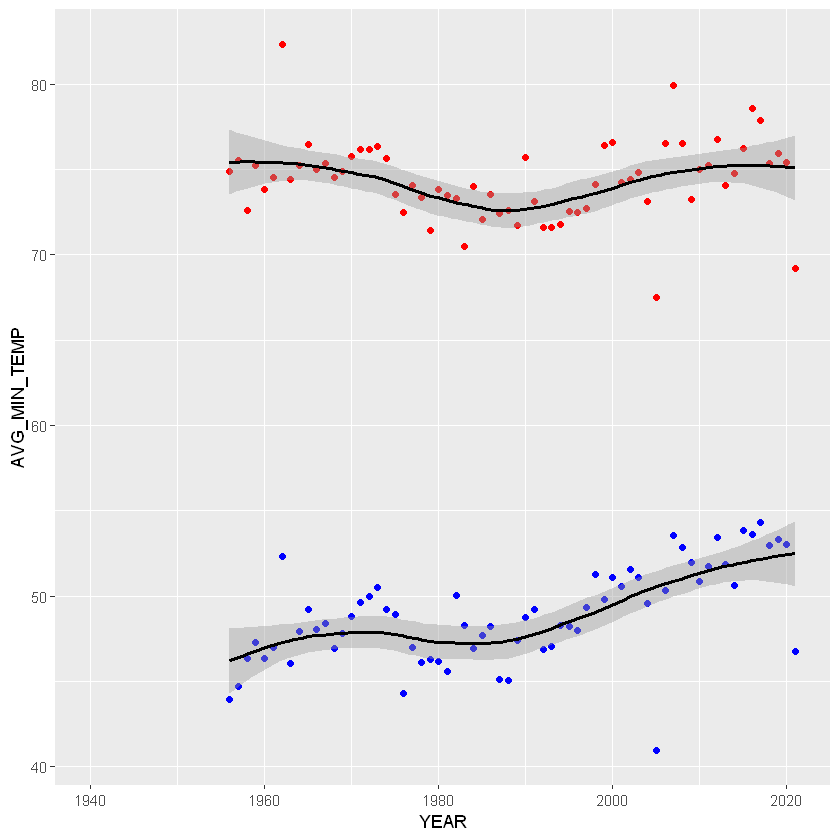

In [76]:
# let's look at average yearly temperatures

yearly_temps <- weather_data_dated %>%
    group_by(YEAR) %>%
    summarize(AVG_MAX_TEMP = mean(TMAX, na.rm = TRUE),
             AVG_MIN_TEMP = mean(TMIN, na.rm = TRUE))

# yearly_temps

ggplot(data = yearly_temps) +
    geom_point(aes(x = YEAR, y = AVG_MIN_TEMP), color = "blue") +
    geom_smooth(aes(x = YEAR, y = AVG_MIN_TEMP), color= "black") +
    geom_point(aes(x = YEAR, y = AVG_MAX_TEMP), color = "red") +
    geom_smooth(aes(x = YEAR, y = AVG_MAX_TEMP), color= "black")


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 5 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 5 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 5 rows containing missing values (geom_point)."
Warning message:
"Removed 5 rows containing missing values (geom_point)."


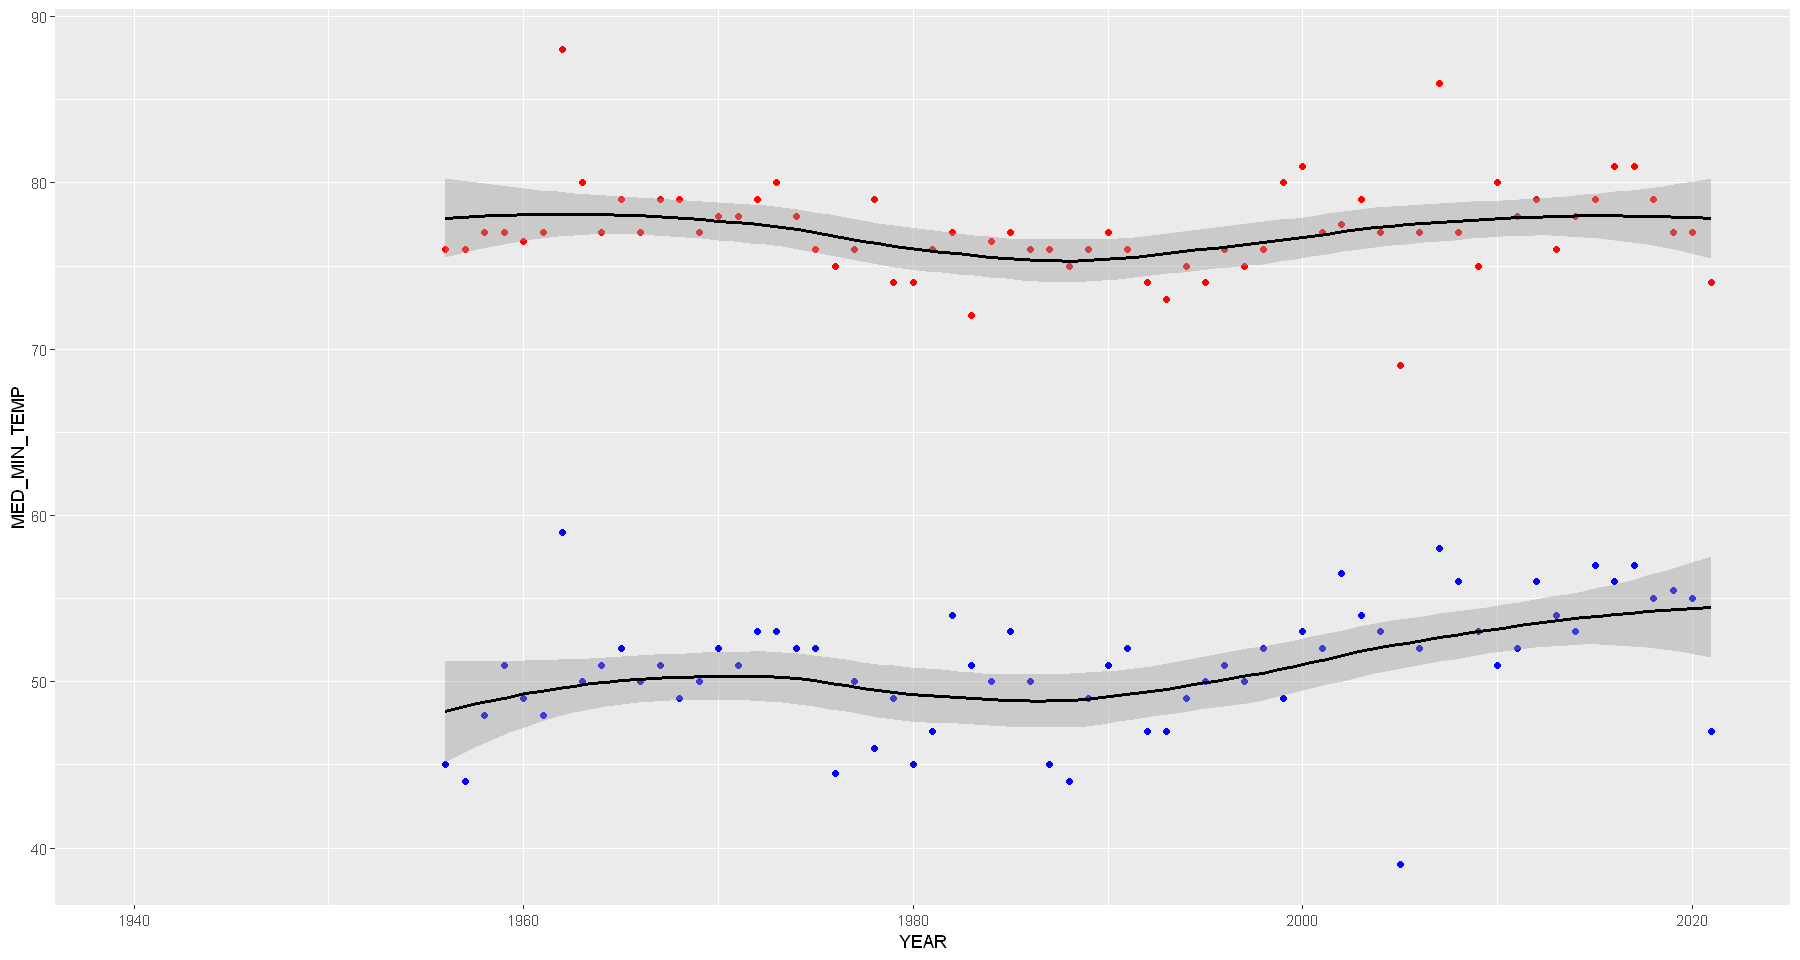

In [86]:
# let's look at median yearly temperatures

yearly_temps <- weather_data_dated %>%
    group_by(YEAR) %>%
    summarize(MED_MAX_TEMP = median(TMAX, na.rm = TRUE),
             MED_MIN_TEMP = median(TMIN, na.rm = TRUE))

# yearly_temps

ggplot(data = yearly_temps) +
    geom_point(aes(x = YEAR, y = MED_MIN_TEMP), color = "blue") +
    geom_smooth(aes(x = YEAR, y = MED_MIN_TEMP), color= "black") +
    geom_point(aes(x = YEAR, y = MED_MAX_TEMP), color = "red") +
    geom_smooth(aes(x = YEAR, y = MED_MAX_TEMP), color= "black")

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



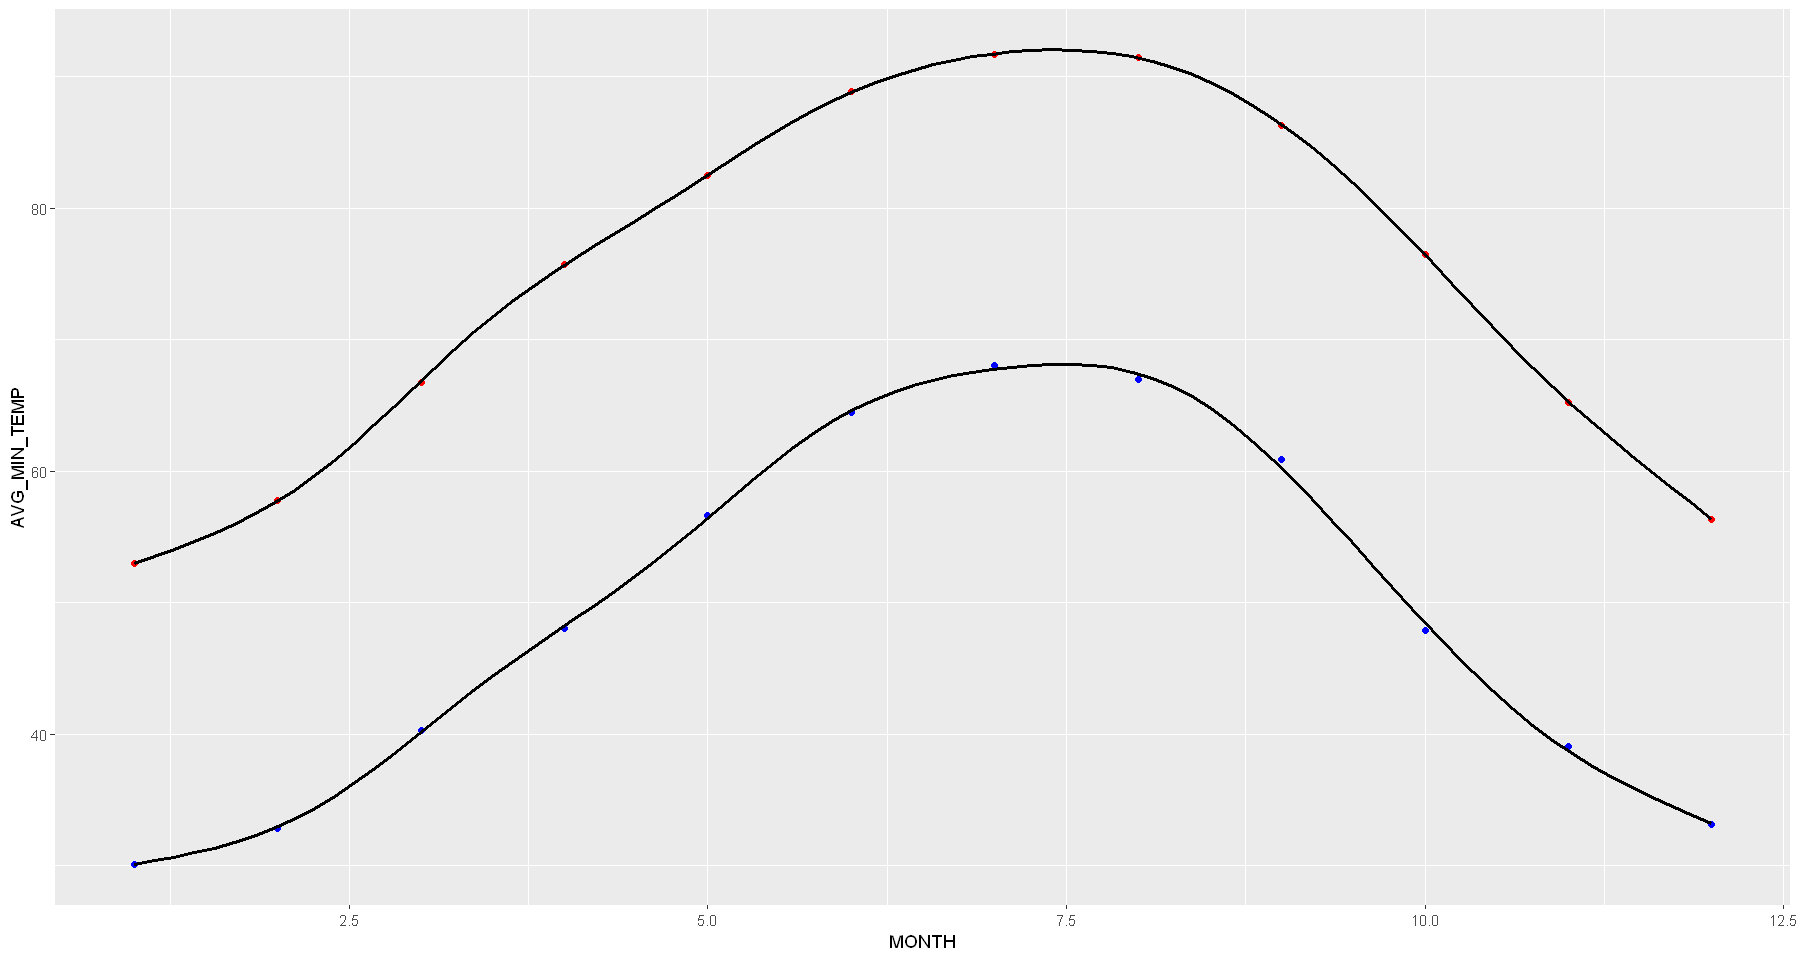

In [92]:
# let's look at average monthly temperatures

yearly_temps <- weather_data_dated %>%
    group_by(MONTH) %>%
    summarize(MONTH = MONTH,
             AVG_MAX_TEMP = mean(TMAX, na.rm = TRUE),
             AVG_MIN_TEMP = mean(TMIN, na.rm = TRUE))

# yearly_temps

ggplot(data = yearly_temps) +
    geom_point(aes(x = MONTH, y = AVG_MIN_TEMP), color = "blue") +
    geom_smooth(aes(x = MONTH, y = AVG_MIN_TEMP), color= "black") +
    geom_point(aes(x = MONTH, y = AVG_MAX_TEMP), color = "red") +
    geom_smooth(aes(x = MONTH, y = AVG_MAX_TEMP), color= "black")